In [71]:
# Importing Necessary Libraries
# Data partitioning
import numpy as np
import pandas as pd

# Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# data partioning
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix


# Text Preprocessing/ analyzing
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import string
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


## Data Loading

In [ ]:
# Loading Data into dataframe
df_train = pd.read_csv('/content/mydrive/MyDrive/world-championship-2023-risk-evaluation/train_data.csv')
df_test = pd.read_csv('/content/mydrive/MyDrive/world-championship-2023-risk-evaluation/test_data_post.csv')

## EDA

In [ ]:
df_train.head()

,Tweets,Risk Analysis
0,interested in a job in epping nh this could be...,0.0
1,community violence cv is a public health epide...,1.0
2,cvs took a step that shows it s gearing up to ...,0.0
3,this job is now open at cvs health in henderso...,0.0
4,at cvs health we are committed to empowering m...,0.0


In [ ]:
df_train.shape

(20204, 2)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20204 entries, 0 to 20203
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweets         20204 non-null  object 
 1   Risk Analysis  20204 non-null  float64
dtypes: float64(1), object(1)
memory usage: 315.8+ KB


In [ ]:
df_train.describe()

,Risk Analysis
count,20204.000000
mean,0.318105
std,0.465752
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_test.head()

,ID,Tweets
0,1,knowing what s right for you and your body isn...
1,2,looks like we need to boycott walmart exxonmob...
2,3,#cvshealth says of its employees are racially ...
3,4,be a part of cvshealth on our journey to trans...
4,5,juddlegum ford walmart delta deloitte nrcc lib...


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5052 non-null   int64 
 1   Tweets  5052 non-null   object
dtypes: int64(1), object(1)
memory usage: 79.1+ KB


In [ ]:
df_test.describe()

,ID
count,5052.00000
mean,2526.50000
std,1458.53111
min,1.00000
25%,1263.75000
50%,2526.50000
75%,3789.25000
max,5052.00000


In [ ]:
df_train.isna().sum()

Tweets           0
Risk Analysis    0
dtype: int64

In [ ]:
df_test.isna().sum()

ID        0
Tweets    0
dtype: int64

In [ ]:
df_train['Risk Analysis'].value_counts()

0.0    13777
1.0     6427
Name: Risk Analysis, dtype: int64

<Axes: title={'center': 'Frequency over Risk'}, xlabel='Risk', ylabel='Frequency'>

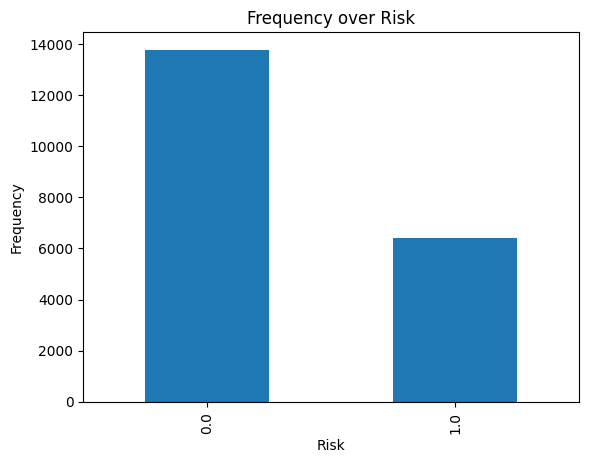

In [ ]:
df_train['Risk Analysis'].value_counts().plot(kind='bar',xlabel="Risk",ylabel='Frequency',title='Frequency over Risk')

## Top 20 words for the training data

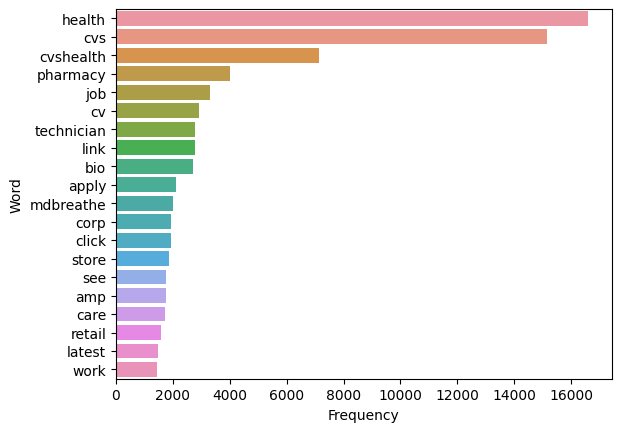

In [ ]:
stop_words = set(stopwords.words('english'))
word_freq =  Counter()
for text in  df_train['Tweets']:
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
    word_freq.update(tokens)

word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.show()

### Word cloud for the training data

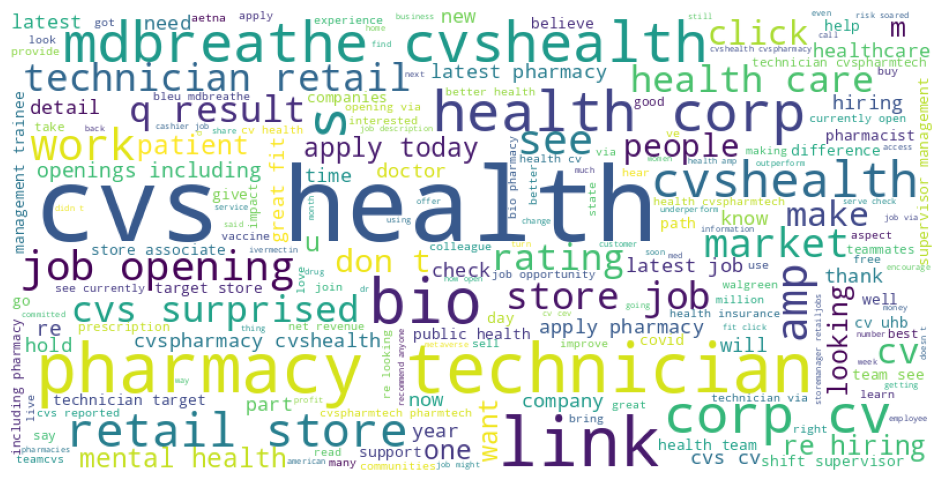

In [ ]:
text = ''.join( df_train['Tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


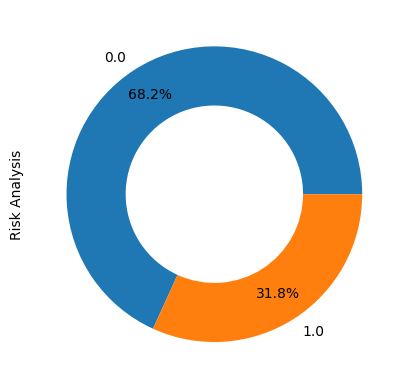

In [ ]:

count = df_train['Risk Analysis'].value_counts()

count.plot(kind='pie',autopct='%1.1f%%', pctdistance=0.8, wedgeprops=dict(width=0.4))
plt.xlabel
plt.ylabel
plt.show()

In [ ]:
# Hypothesis ----------------------------------------------------------------
# 1.Changing every col to lower case
# 2. Remove Punctuations----
# 3. Remove Numbers
# 4. Remove extra space
# 5. Tokenization
# 6. Removal of Stop-words
# 7. Text - normalization
# 8. Stemming/Lemmatization


In [ ]:
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenization
    tokens = nltk.word_tokenize(text)

    # 4. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text


# Apply preprocessing to the 'text_column' and store results in a new column
df_train['preprocessed_text'] = df_train['Tweets'].apply(preprocess_text)








In [ ]:
df_train.head()

,Tweets,Risk Analysis,preprocessed_text
0,interested in a job in epping nh this could be...,0.0,interested job epping nh could great fit click...
1,community violence cv is a public health epide...,1.0,community violence cv public health epidemic u...
2,cvs took a step that shows it s gearing up to ...,0.0,cv took step show gearing major health presenc...
3,this job is now open at cvs health in henderso...,0.0,job open cv health henderson tx follow u turn ...
4,at cvs health we are committed to empowering m...,0.0,cv health committed empowering million custome...


## Word-cloud after preprocesssing

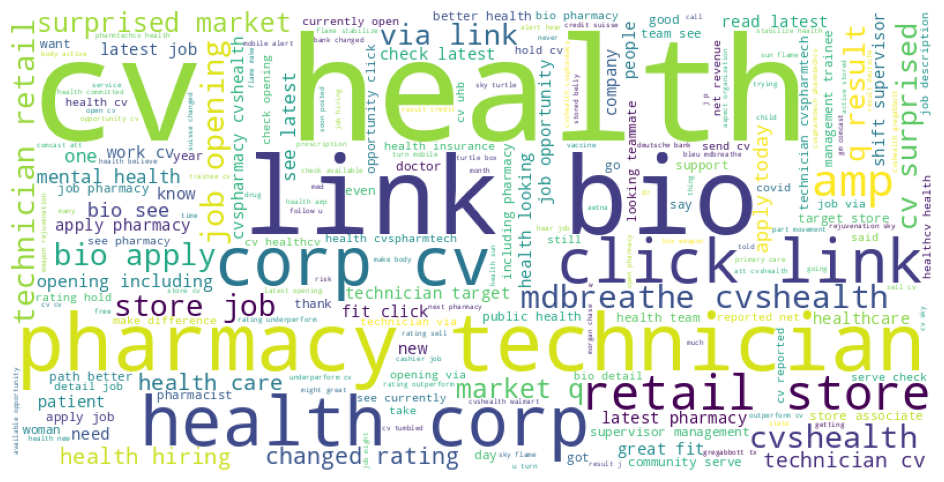

In [ ]:
text = ''.join( df_train['preprocessed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:

X = df_train['preprocessed_text']
y = df_train['Risk Analysis']


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(min_df=4, max_df=0.7)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



# Models

## 1. Support Vector Classifier

In [ ]:
SVC = LinearSVC(random_state=42)
SVC.fit(X_train, y_train)

# Evaluate model
y_pred = SVC.predict(X_test)
y_pred_train = SVC.predict(X_train)
accuracy_testing_SVC = accuracy_score(y_test, y_pred)
accuracy_training_SVC = accuracy_score(y_train, y_pred_train)

# Training accuracy
print('Training Accuracy of Support Vector Classifier: ', accuracy_training_SVC)
# Testing accuracy
print('Testing Accuracy of Support Vector Classifier: ', accuracy_testing_SVC)
# Precision Score
precision = precision_score(y_test, y_pred, average='macro')
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred, average='macro')
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score:", f1)

Training Accuracy of Support Vector Classifier:  0.9834535426389478
Testing Accuracy of Support Vector Classifier:  0.9191685912240185
Precision score for testing: 0.9165664731896075
Recall score for testing: 0.8941893509576694
F1 score: 0.904143702285322


## 2. Naive Bayes Classifier

In [ ]:
NB = MultinomialNB()
NB.fit(X_train, y_train)

# Model Evaluation
y_pred_train_NB = NB.predict(X_train)
y_pred_NB= NB.predict(X_test)
accuracy_testing_NB = accuracy_score(y_test, y_pred_NB)
accuracy_training_NB = accuracy_score(y_train,y_pred_train_NB)

# Training accuracy
print('Training Accuracy of Naive Bayes: ', accuracy_training_NB)
# Testing accuracy
print("Testing Accuracy of Naive Bayes", accuracy_testing_NB)
# Precision Score
precision = precision_score(y_test, y_pred_NB, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_NB, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_NB, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Naive Bayes:  0.901074812614906
Testing Accuracy of Naive Bayes 0.8747937974265919
Precision score for testing: 0.8525429515621137
Recall score for testing: 0.863812645863512
F1 score: 0.8577005999602333


## 3. Logistic Regression

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

# Model Evaluation
y_pred_train_LR = LR.predict(X_train)
y_pred_LR = LR.predict(X_test)
accuracy_testing_LR = accuracy_score(y_test, y_pred_LR)
accuracy_training_LR = accuracy_score(y_train,y_pred_train_LR)

# Training accuracy
print('Training Accuracy of Logistic Regression: ', accuracy_training_LR)
# Testing accuracy
print("Testing Accuracy of Logistic Regression: ", accuracy_testing_LR)
# Precision Score
precision = precision_score(y_test, y_pred_LR, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_LR, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_LR, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Logistic Regression:  0.9344505727619856
Testing Accuracy of Logistic Regression:  0.8947542065324975
Precision score for testing: 0.8977911619431419
Recall score for testing: 0.855088876146789
F1 score: 0.8719975715138468


## 4. Random Forest Classfier

In [ ]:
RF = RandomForestClassifier(max_depth=50,n_estimators=200,random_state=42)
RF.fit(X_train, y_train)

# Model Evaluation
y_pred_train_RF = RF.predict(X_train)
y_pred_RF = RF.predict(X_test)
accuracy_testing_RF = accuracy_score(y_test, y_pred_RF)
accuracy_training_RF = accuracy_score(y_train,y_pred_train_RF)

# Training accuracy
print('Training Accuracy of Random Forest: ', accuracy_training_RF)
# Testing accuracy
print("Testing Accuracy of Random Forest: ", accuracy_testing_RF)
# Precision Score
precision = precision_score(y_test, y_pred_RF, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_RF, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_RF, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Random Forest:  0.9090651958704568
Testing Accuracy of Random Forest:  0.8596172880237546
Precision score for testing: 0.8990539180268139
Recall score for testing: 0.7843926042169644
F1 score: 0.8146042458987968


## 5. Decision Tree Classifier

In [ ]:
DT = DecisionTreeClassifier(max_depth=125,random_state=42)
DT.fit(X_train, y_train)

# Model Evaluation
y_pred_train_DT = DT.predict(X_train)
y_pred_DT = DT.predict(X_test)
accuracy_testing_DT = accuracy_score(y_test, y_pred_DT)
accuracy_training_DT = accuracy_score(y_train,y_pred_train_DT)

# Training accuracy
print('Training Accuracy of Decision Tree: ', accuracy_training_DT)
# Testing accuracy
print("Testing Accuracy of Decision Tree: ", accuracy_testing_DT)
# Precision Score
precision = precision_score(y_test, y_pred_DT, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_DT, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_DT, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Decision Tree:  0.992080328100693
Testing Accuracy of Decision Tree:  0.8391619927416695
Precision score for testing: 0.8188600663361945
Recall score for testing: 0.8018348623853211
F1 score: 0.8092950639930903


## 6. Gradient Boosting Classifier

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=50, random_state=42)
GBC.fit(X_train, y_train)

# Model Evaluation
y_pred_train_GBC = GBC.predict(X_train)
y_pred_GBC = GBC.predict(X_test)
accuracy_testing_GBC = accuracy_score(y_test, y_pred_GBC)
accuracy_training_GBC = accuracy_score(y_train,y_pred_train_GBC)

# Training accuracy
print('Training Accuracy of Gradient Boosting Classifier: ', accuracy_training_GBC)
# Testing accuracy
print("Testing Accuracy of Gradient Boosting Classifier: ", accuracy_testing_GBC)
# Precision Score
precision = precision_score(y_test, y_pred_GBC, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_GBC, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_GBC, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Gradient Boosting Classifier:  0.9994343091500495
Testing Accuracy of Gradient Boosting Classifier:  0.8926096997690531
Precision score for testing: 0.8950985372837968
Recall score for testing: 0.8525416716964429
F1 score: 0.8693672655988933


## 7. Bagging Classification

In [70]:
base_classifier = RandomForestClassifier(random_state=42)
BT = BaggingClassifier(base_classifier,n_estimators=20,random_state=42)
BT.fit(X_train, y_train)

# Model Evaluation
y_pred_train_BT = BT.predict(X_train)
y_pred_BT = BT.predict(X_test)
accuracy_testing_BT = accuracy_score(y_test, y_pred_BT)
accuracy_training_BT = accuracy_score(y_train,y_pred_train_BT)

# Training accuracy
print('Training Accuracy of Bagging Classifier: ', accuracy_training_BT)
# Testing accuracy
print("Testing Accuracy of Bagging Classifier: ", accuracy_testing_BT)
# Precision Score
precision = precision_score(y_test, y_pred_BT, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_BT, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_BT, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Bagging Classifier:  0.9876962240135766
Testing Accuracy of Bagging Classifier:  0.8810623556581986
Precision score for testing: 0.898822209352719
Recall score for testing: 0.8255112767584099
F1 score: 0.8501584996452549


## 1.Conversion to Lower case

In [ ]:
df_train['Tweets'] = df_train['Tweets'].str.lower()

In [ ]:
df_train.head()

## 2. Removal of Punctuations


In [ ]:
df_train['Tweets'] = df_train['Tweets'].str.replace(r'[^\w\s]+', '')

## 3. Removal of Numbers

In [ ]:
df_train['Tweets'] = df_train['Tweets'].str.replace('\d+', '')

## 4.Removal of extra space

In [ ]:
df_train['Tweets'] = df_train['Tweets'].str.replace(r'\s+', ' ')

## 5. Tokenization

In [ ]:


def remove_stop_words(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens


df_train['Tweets_without_stop_words']  = df_train['Tweets'].apply(remove_stop_words)



In [ ]:
def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  return tokens
df_train['tokens'] = df_train['Tweets_without_stop_words'].apply(tokenize_text)